In [ ]:
pip install requests
pip install pandas

In [1]:
from IPython.display import Image

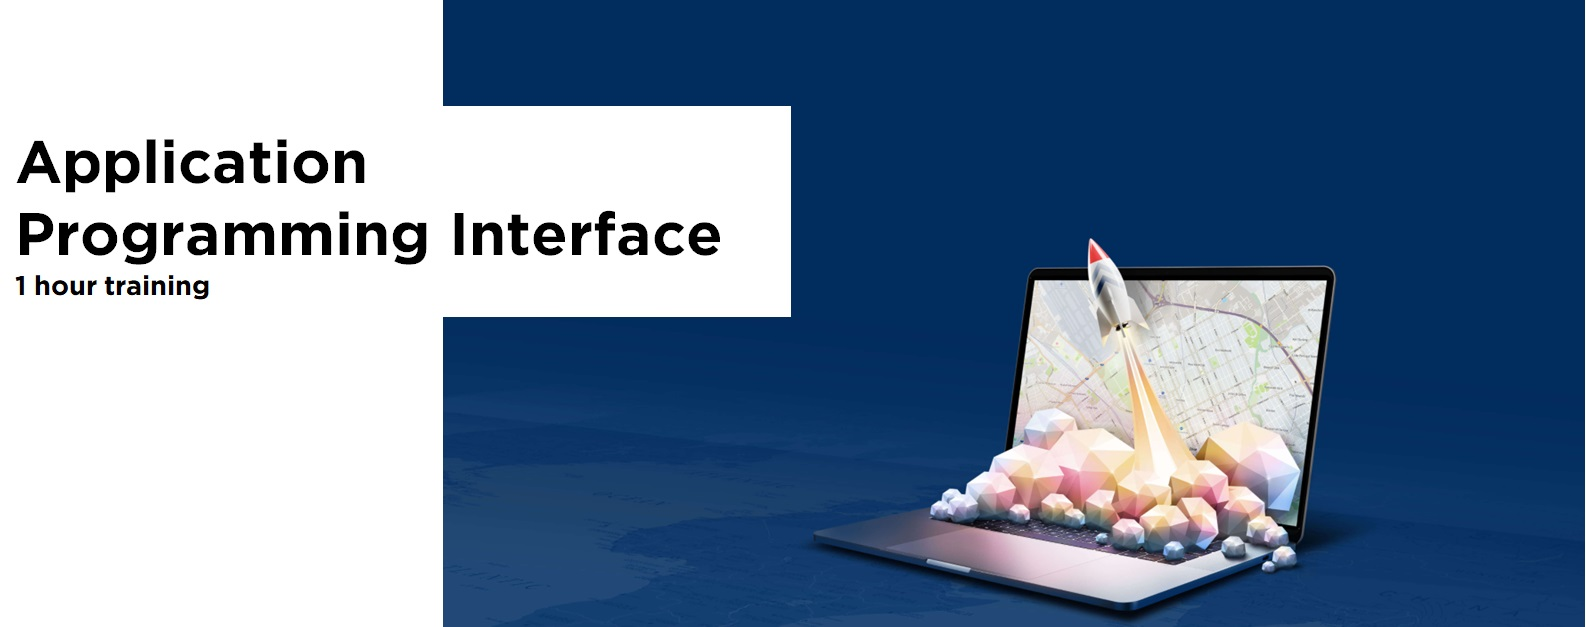

In [2]:
Image(filename='api.jpg')

by [Abraão Nascimento](https://bit.ly/3rtpN4A)
# Why Application Programming Interface (API)? 

[API](https://en.wikipedia.org/wiki/API) are highly used to make the work easier and speed up the development process of other systems and applications. Because of that, many private and public companies make available their data via API services. The main goal is to allow applications to access data and interact with external software components. <br> 

To simplify this explanation let's just take [TomTom Maps API](https://developer.tomtom.com/) as an example. TomTom provides maps and traffic data, with global coverage & advanced functionalities to companies integrate map and traffic data into their systems. Instead of creating a map service from scratch, companies that use API services from other companies can be more concentrated on solving their business problem instead of solving every single problem that needs to be solved to make their product viable.<br>

Knowing that private and public companies have been making their data available via APIs it is crucial for people that work with data to understand how API services work and how to query data and extract data from it.

## Agenda:
__1.__ Set up environment.<br>
__2.__ What is an API? <br>
__3.__ JSON and GEOJSON structures <br>
__4.__ How to access Data from APIs? <br>
__5.__ More examples of companies that make data available via APIs <br>
__6.__ Challenges - TomTom Maps API.<br>
__7.__ Mention.<br>

### 1. Set up environment

Setting up your environment with github, docker and binder: https://mybinder.org/v2/gh/abraaonascimento/1_Hour_API_Training/HEAD

### 2. What is an API? 
If we search for websites in general, most of the information we can see is specifically designed for non-technical people. The majority of websites contains information that everyone can read and understand. What an API does is to provide information that is ***specifically designed for programmatic consumption***. Then, when you access an API, you are accessing a web address (URL) as any other website, but what you will get in most of the cases is data designed for programmatic consumption, not a common webpage.  

#### **The data flow below help to understand how API services work**

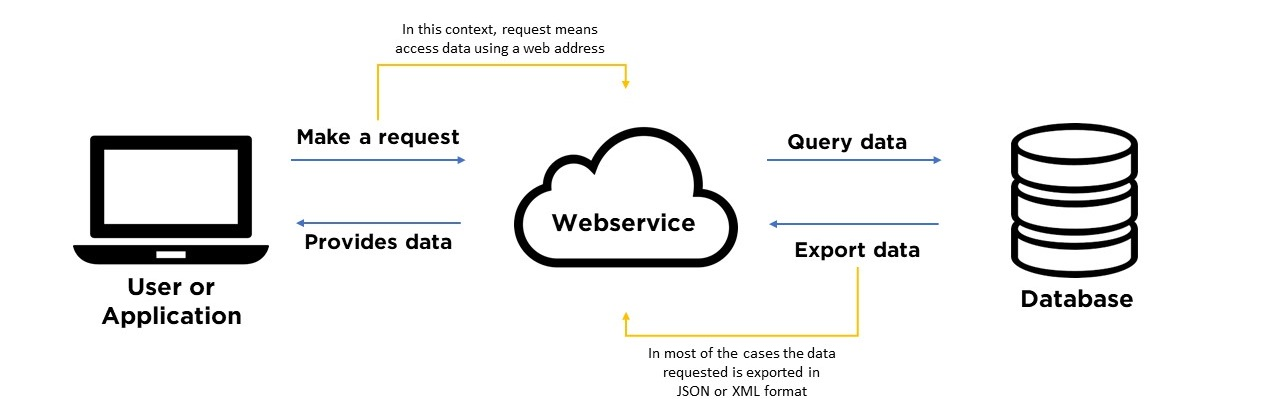

In [3]:
Image(filename='flow.jpg')

APIs can provide any kind of data. It can be images, text, audio, code, etc. And all these types of data, in general, are available inside a data structure. The [most common data structures](https://www.programmableweb.com/news/json-clearly-king-api-data-formats-2020/research/2020/04/03) currently used by APIs to export data are JSON and XML formats. This training will focus on the JSON structure since it has an extension called [GEOJSON](https://geojson.org/) that is adopted in the GIS industry. 

### 3. JSON and GEOJSON structures

JSON and GEOJSON structures are a set of data composed by a collection of key/value pairs in a text format. The main difference between JSON and GEOJSON is that GEOJSON files follow a format for encoding a variety of geographic data types as Point, Polyline or LineString, Polygon, MultiPoint, MultiLineString, and MultiPolygon. Let's start taking a look at the JSON format first.

#### **Table to JSON: This Example helps understand how JSON is build**

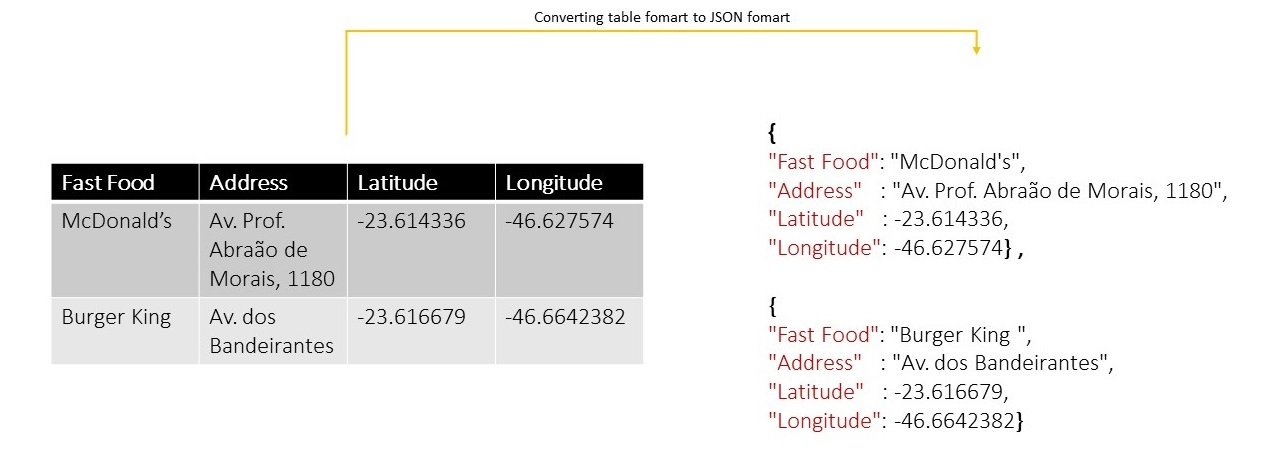

In [4]:
Image(filename='table2json.jpg')

Comparing table to JSON format it is possible to see that the ***'fields'*** in the table as Fast Food, Address, Latitude and Longitude will be ***'keys'*** of the JSON file and the records will be the ***'values'***.

#### **JSON Structure**

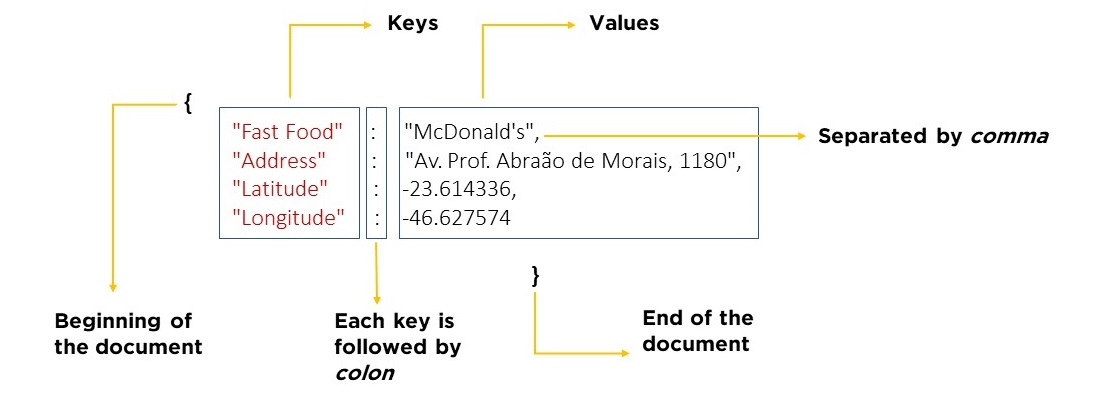

In [5]:
Image(filename='json.jpg')

As it was mention above. A JSON document/object is a set of key/value pairs. A JSON document begins with **{** *left brace* and ends with **}** *right brace*. Each key is followed by **:** *colon* and the key/value pairs are separated by **,** *comma*.

#### **Let's do some exercice!**

In [ ]:
{
"Fast Food": "McDonald's",
"Address"  : "Av. Prof. Abraão de Morais, 1180",
"Latitude" : -23.614336,
"Longitude": -46.627574
},

{
"Fast Food": "Burger King",
"Address"  : "Av. dos Bandeirantes",
"Latitude" : -23.616679,
"Longitude": -46.6642382
}

#### **GEOJSON Structure**
GEOJSON files follow the same key/value pairs concept as JSON does. However, as was mentioned above GEOJSON has a unique structure to encoding a variety of geographic data types as Point, Polyline or LineString, Polygon, MultiPoint, MultiLineString, and MultiPolygon. The conversion of a JSON file to GEOJSON presented below can help better understand how this structure works.

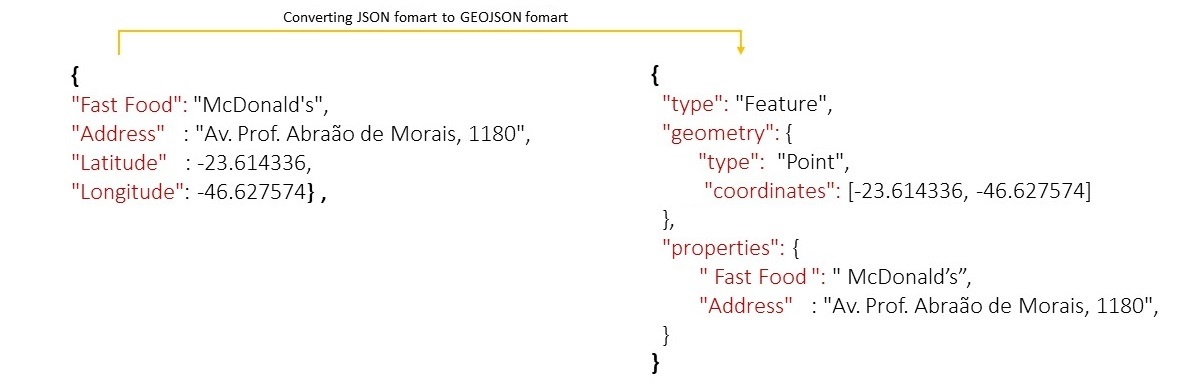

In [6]:
Image(filename='json2geojson.jpg')

GEOJSON structure requires standard keys and sub-keys to represent geometric data. The first mandatory key is the **type** that can be a single Feature (in this case a single Point) or it can be a FeatureCollection (what will be multiple Points). The second mandatory key is the **geometry** that has its own keys **type** and **coordinates**. The geometry type can be Point, LineString, Polygon, MultiPoint, MultiLineString, or MultiPolygon. To know more about how these types work, you can follow [this paper](https://macwright.com/2015/03/23/geojson-second-bite.html) on GEOJSON files. This training will focus on explaining how the Feature and FeatureCollection work for geometry type Point.

#### **Let's do some exercice!**

In [ ]:
{
  "type": "Feature",
  "geometry": {
    "type" : "Point",
    "coordinates": [-23.614336, -46.627574]
  },
  "properties"  : {
    "Fast Food" : "McDonald’s",
    "Address"   : "Av. Prof. Abraão de Morais, 1180",
  }
}

In [ ]:
{
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "geometry": {
        "type": "Point",
        "coordinates": [-23.614336, -46.627574]
      },
      "properties": {
        "Fast Food" : "McDonald’s",
        "Address"   : "Av. Prof. Abraão de Morais, 1180",
      }
    },
    {
      "type": "Feature",
      "geometry": {
        "type": "Point",
        "coordinates": [-23.616679, -46.6642382]
      },
      "properties": {
        "Fast Food" : "Burger King",
        "Address"   : "Av. dos Bandeirantes",
      }
    }
  ]
}

Some advantages of using GEOJSON files instead of JSON is that GEOJSON support complex geometry types as MultiPolygon and it is compatible with most of the GIS software and libraries tools like QGIS, GeoPandas, FME, and others. It is possible to use these tools to easily open GEOJSON and perform GIS data operations or export it to other GIS formats.  

### 4. How to Access Data from APIs? 

To access data from APIs it is needed to create a request. In other words, it will be necessary to write a web address according to the API specifications. In this training, it will be used two APIs as examples. They are: <br>

- [ViaCEP](https://viacep.com.br/)
- [TomTom Maps Search API](https://developer.tomtom.com/search-api/search-api-documentation-geocoding/geocode)

For these APIs there are two ways possible to get information from. First, directly using a browser to have a quick look at the data. Second, it is viable to use a programming language (in this case will be Python) to extract and visualize data. The advantage of using a web browser first is that we can see which type of information is coming from the APIs in a very fast way. The advantage of using a programming language is that it is possible to write code once to extract and analyse a high volume of data anytime needed, or even integrate it to other systems. 

#### **ViaCEP**
Let's start with a simple example of API. It is [ViaCEP](https://viacep.com.br/). With this API we can pass a parameter (postal code) and get as response a JSON file with the address information (Street Name, Neighborhood, State). The documentation needed to access the API is showed below. 

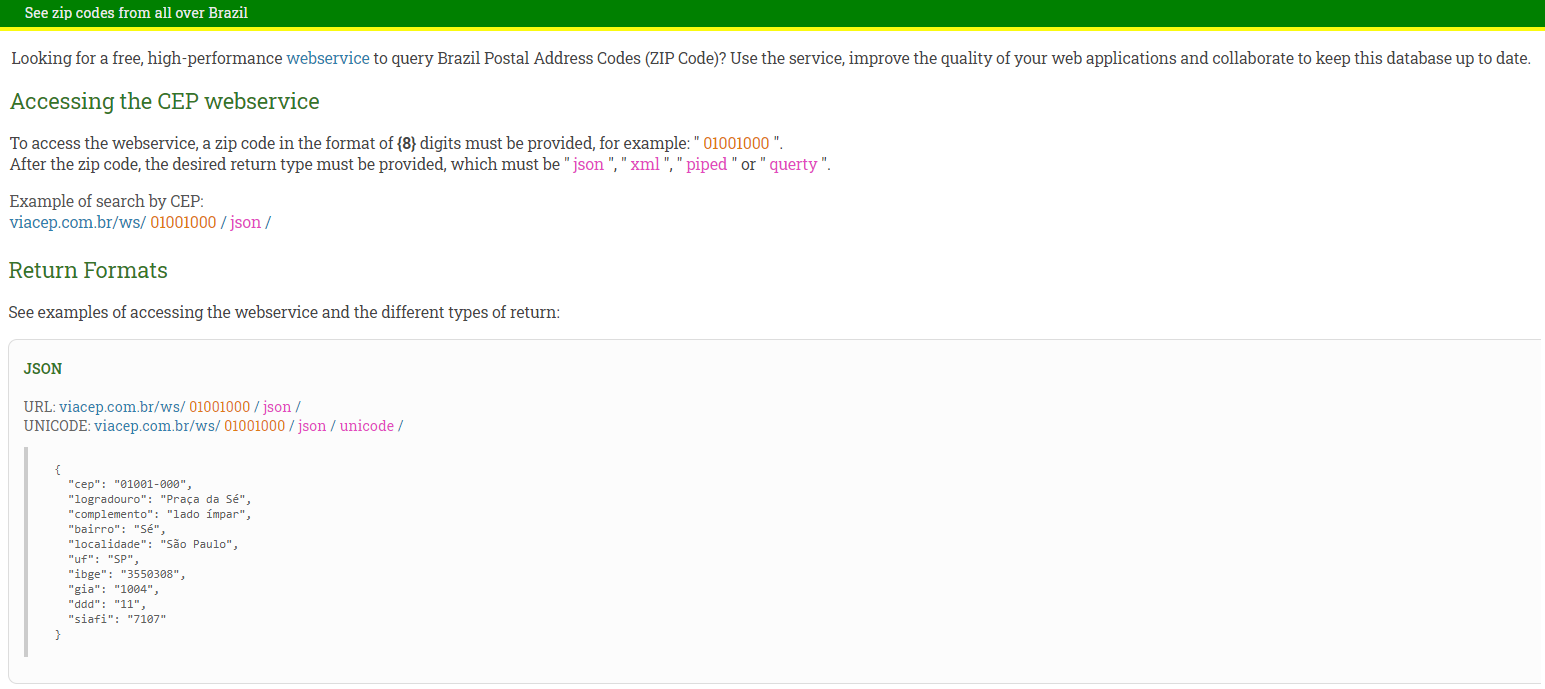

In [7]:
Image(filename='viaCEP.jpg')

Basically to access the data it is needed to provide a postal code information under this web address structure *** viacep.com.br/ws/ + postalcode + /json/*** <br>
- Example:  viacep.com.br/ws/04146020/json/ <br>

If we copy and paste this example in a browser we will get as results a JSON file. Doing that it is possible to give a quick look into the data. For a high volume of postal codes, it is possible to execute many requests by writing and executing code. 

#### **Let's do some exercice!**

In [ ]:
import requests

In [ ]:
data = requests.get('http://viacep.com.br/ws/04146020/json/')

In [ ]:
data = data.json()

#### **TomTom Maps Search API**

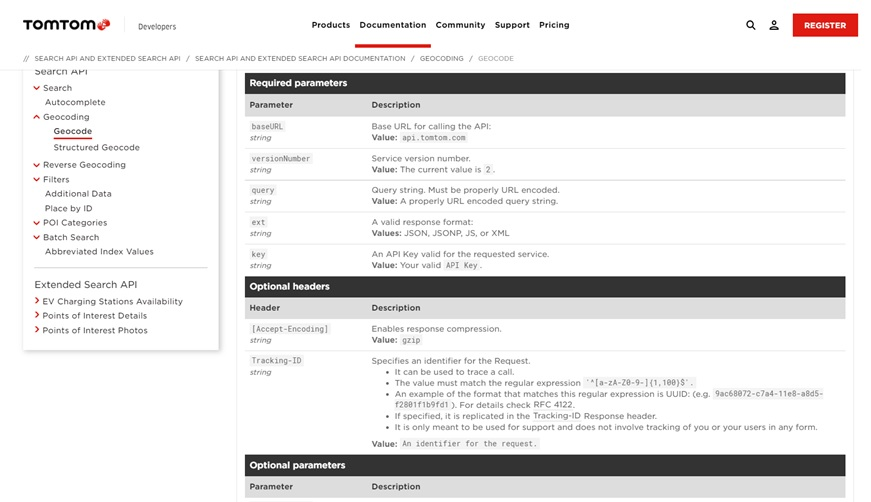

In [8]:
Image(filename='ttmaps.jpg')

The documentation available on the [TomTom Developer Portal](https://developer.tomtom.com/search-api/search-api-documentation-geocoding/geocode) shows how to create a request to get information from TomTom Maps API. In this example, it will be used the Geocoding API. The main goal will be to send an address and get coordinates in the response. As we can see in the image above there are 5 parameters we need to build the request. They are:
- Base URL 
- Version Number
- Query
- Extension (ext)
- Key

To get an API free key it is required to be registered on TomTom Maps API. The registration can be done [here](https://developer.tomtom.com/user/register).

#### **Let's do some exercice!**

In [ ]:
https://<baseURL>/search/<versionNumber>/geocode/<query>.<ext>?key=<Your_API_Key>

In [ ]:
data = requests.get(URL)

In [ ]:
data.json()

### 5. More examples of companies that make data available via APIs

There are many public and private APIs that can be explored. One example of it is the [APILIB platform](https://apilib.prefeitura.sp.gov.br/store/) that *'offers data communication interfaces that organize and make available information from the City of São Paulo. The goal is to encourage the development of solutions that make life easier in the city through open data and active transparency'*.

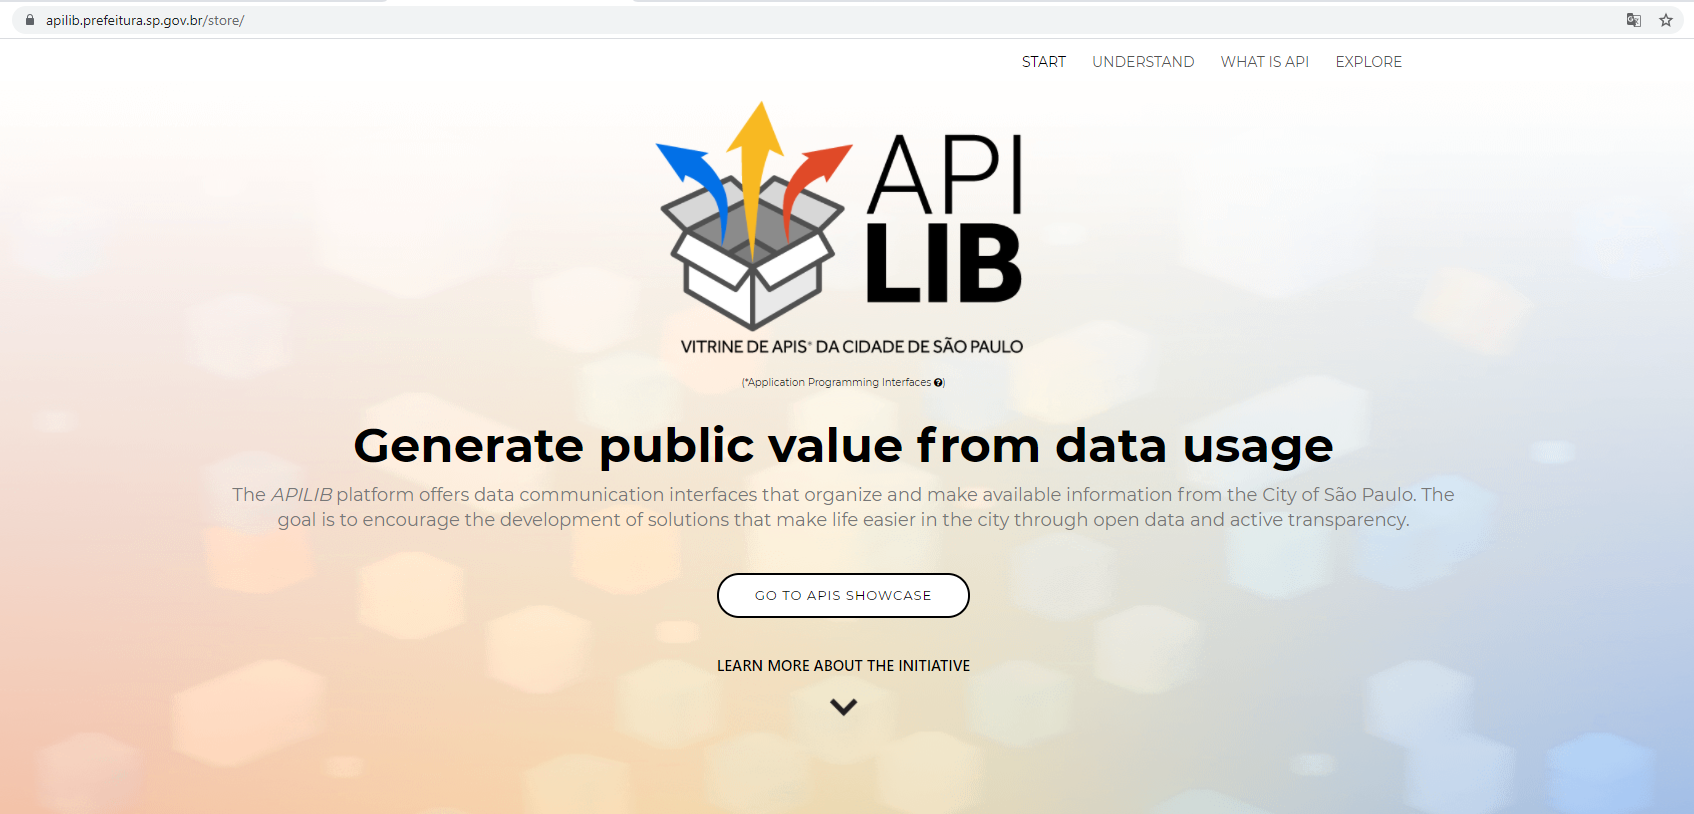

In [9]:
Image(filename='sampa_apis.jpg')

### 6. Challenges - TomTom Maps API
1. Create a request that sends coordinates and get an address in the response 
2. Create a request to find Points of Interest (POIs)

### 7. Mention

This training was created based on the open resources:

 - [json.org](https://json.org)
 - [geojson.org](https://geojson.org)
 - [TomTom Maps API](https://medium.com/thoughtful-data-science/geopandas-an-introduction-c544a352c662)
 - [ViaCEP](https://github.com/geopandas/scipy2018-geospatial-data)
 - [City of São Paulo](https://apilib.prefeitura.sp.gov.br/store/)
 - [More than you ever wanted to know about GeoJSON](https://macwright.com/2015/03/23/geojson-second-bite.html)